In [ ]:
!pip install -r ../requirements.txt

In [ ]:
!pip install diffusers=0.16.0

In [1]:
import path
path.setPathLocalNotebook()

from diffuserslib import loginHuggingFace, DiffusersPipelines, DiffusersBaseModel

# loginHuggingFace('token')

pipelines = DiffusersPipelines(device = "mps", safety_checker=True, cache_dir=None)
pipelines.loadPresetFile("../../modelconfig.yml")
# pipelines.createTextToImagePipeline('runwayml/stable-diffusion-v1-5')

# pipelines.loadLORA("epiNoiseoffset_v2.safetensors", "sd_1_5", weight=1.5)

# First-time "warmup" pass because of issue with m1 cpu: https://github.com/huggingface/diffusers/issues/372
# _, _ = diffusers.textToImage(prompt="", negprompt="", steps=5, scale=7, width=512, height=512)



Creating StableDiffusionTextToImagePipelineWrapper pipeline from model runwayml/stable-diffusion-v1-5


/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/safetensors/torch.py:99: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'safety_chceker': True} are not expected by StableDiffusionPipeline and will be ignored.
/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/transformers/modeling_utils.py:402: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'safety_chceker': True} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/40 [00:00<?, ?it/s]

/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/diffusers/schedulers/scheduling_euler_discrete.py:168: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:218.)
  step_index = (self.timesteps == timestep).nonzero().item()
/Users/roberte/miniconda3/envs/sd/lib/python3.9/site-packages/torch/nn/functional.py:3931: UserWarning: MPS: passing scale factor to upsample ops is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/UpSample.mm:233.)
  return torch._C._nn.upsample_nearest2d(input, output_size, scale_factors)


Seed: 2134167897


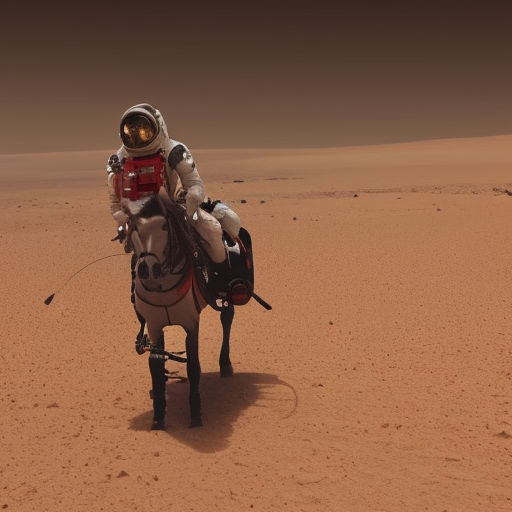

In [2]:
from IPython.display import display

prompt = "a photo of an astronaut riding a horse on mars, dark, dimly lit"
# model = "stabilityai/stable-diffusion-2-1-base"
model = "runwayml/stable-diffusion-v1-5"
image, seed = pipelines.textToImage(prompt=prompt, negprompt="", steps=40, scale=7, width=512, height=512, scheduler="EulerDiscreteScheduler", seed=None, model=model)

print(f"Seed: {seed}")

# for image in images:
display(image)


In [ ]:
from IPython.display import display
from PIL import Image

prompt = "a photo of an astronaut riding a horse on mars, dark, dimly lit"
# model = "stabilityai/stable-diffusion-2-1-base"
model = "runwayml/stable-diffusion-v1-5"
controlmodel = "lllyasviel/sd-controlnet-canny"

image = Image.open("data/rabbit.png")
control = Image.open("data/rabbit.png")
image, seed = pipelines.imageToImageControlNet(prompt=prompt, initimage=image, controlimage=control, 
                                               negprompt="", strength=0.5, scale=7, width=512, height=512, scheduler="EulerDiscreteScheduler", seed=None, 
                                               model=model, controlmodel=controlmodel)

print(f"Seed: {seed}")

# for image in images:
display(image)

In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
pipe = pipe.to("mps")

# Recommended if your computer has < 64 GB of RAM
# pipe.enable_attention_slicing()

prompt = "a photo of an astronaut riding a horse on mars"

# First-time "warmup" pass (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt).images[0]